In [5]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [7]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [8]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [9]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME)
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v3(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v3(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/500 [00:00<?, ?it/s]

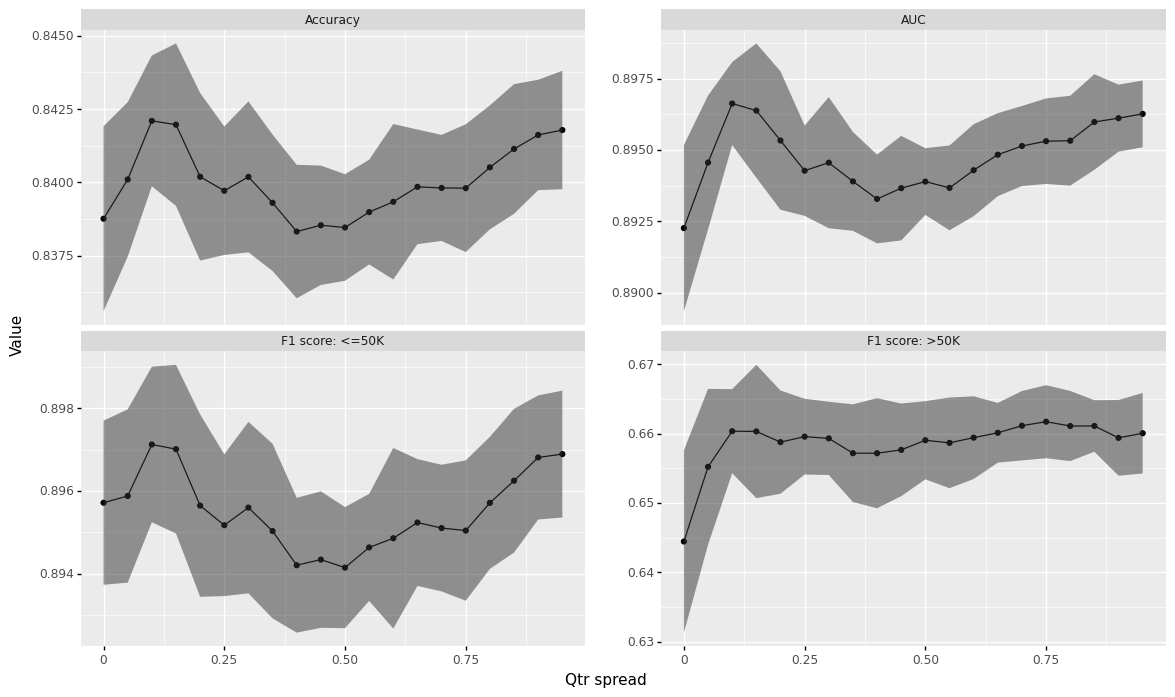

In [34]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [13]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.838765,0.892265,0.770076,0.895718,0.644433,0.003153,0.002910,0.007045,0.001983,0.013138
1,0.05,0.840104,0.894560,0.775542,0.895881,0.655202,0.002634,0.002343,0.005619,0.002094,0.011235
2,0.10,0.842101,0.896624,0.778731,0.897125,0.660336,0.002229,0.001452,0.003061,0.001879,0.006061
3,0.15,0.841971,0.896379,0.778656,0.897013,0.660299,0.002770,0.002352,0.005089,0.002037,0.009606


  0%|          | 0/270 [00:00<?, ?it/s]

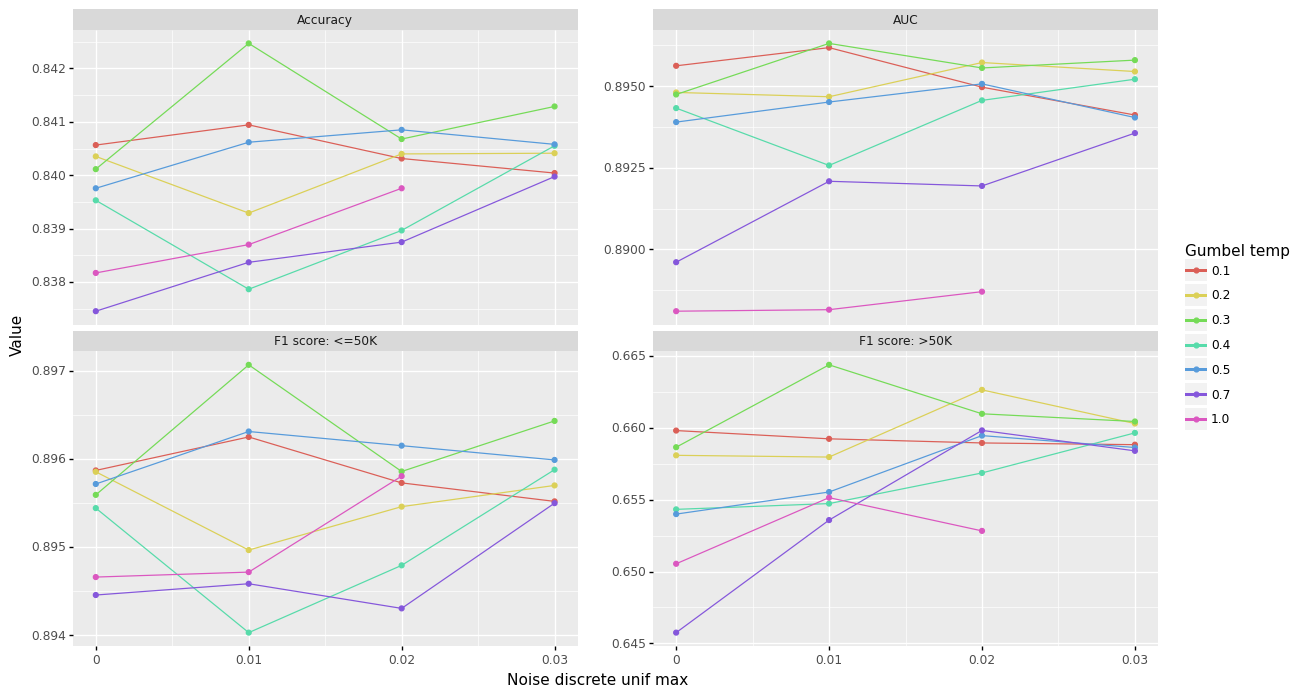

In [32]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

In [33]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.1,0.840564,0.895623,0.777837,0.895870,0.659804,0.002215,0.001140,0.003027,0.001822,0.005865
1,0.00,0.2,0.840352,0.894808,0.776968,0.895854,0.658082,0.002525,0.001954,0.003980,0.001807,0.007057
2,0.00,0.3,0.840113,0.894745,0.777119,0.895592,0.658645,0.001850,0.001567,0.003169,0.001552,0.006408
3,0.00,0.4,0.839529,0.894327,0.774883,0.895442,0.654325,0.001634,0.001703,0.006649,0.001828,0.014351
4,0.00,0.5,0.839754,0.893899,0.774855,0.895716,0.653995,0.001636,0.001225,0.003508,0.001353,0.007151
5,0.00,0.7,0.837450,0.889607,0.770105,0.894456,0.645753,0.003471,0.004072,0.010504,0.001913,0.020368
6,0.00,1.0,0.838167,0.888107,0.772600,0.894660,0.650540,0.003223,0.003252,0.003166,0.002986,0.007062
7,0.01,0.1,0.840943,0.896180,0.777739,0.896249,0.659229,0.001162,0.001140,0.002811,0.001015,0.005853
8,0.01,0.2,0.839290,0.894675,0.776464,0.894966,0.657962,0.000815,0.001058,0.002186,0.000512,0.004266
9,0.01,0.3,0.842470,0.896309,0.780721,0.897067,0.664375,0.001672,0.001673,0.002894,0.001433,0.005920


  0%|          | 0/75 [00:00<?, ?it/s]

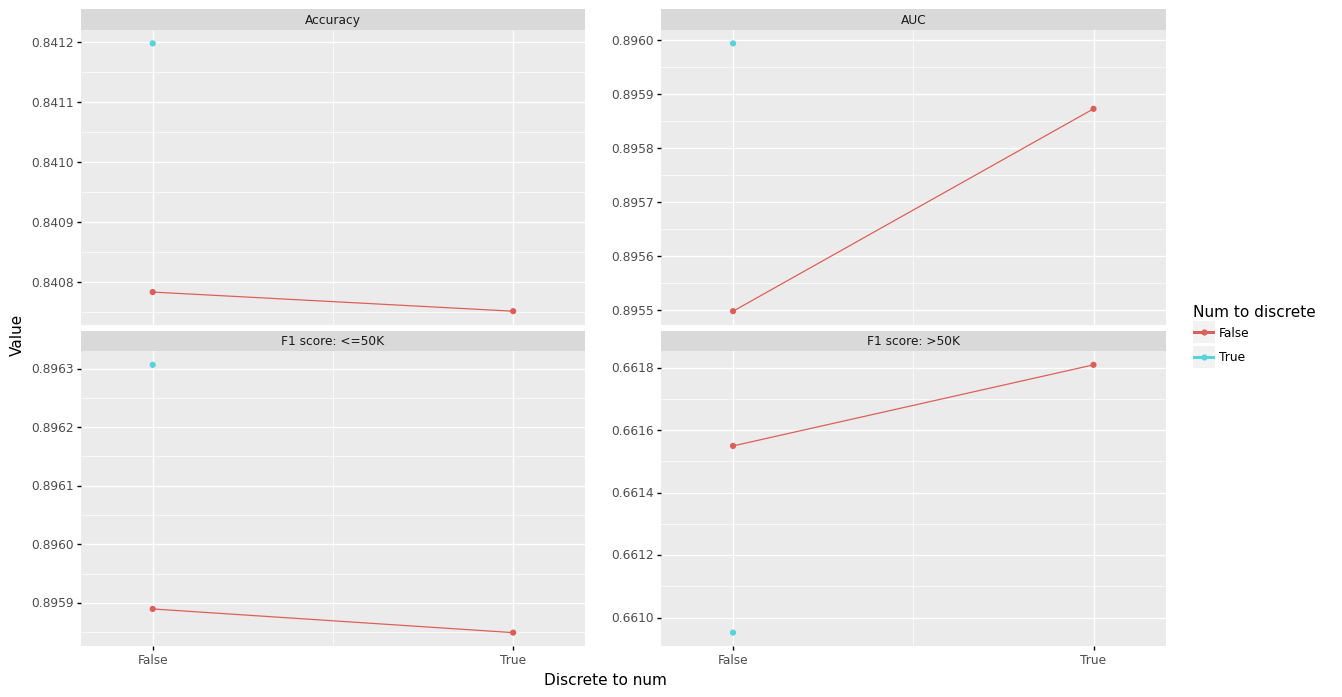

In [26]:
result_add_connection = plot_hp_tuning("add_connection")

In [27]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.840784,0.895499,0.778720,0.895890,0.661550,0.001808,0.001660,0.003222,0.001564,0.006637
1,False,True,0.841198,0.895994,0.778629,0.896307,0.660952,0.002101,0.001535,0.002946,0.001668,0.005480
2,True,False,0.840752,0.895873,0.778829,0.895849,0.661810,0.002019,0.001375,0.002422,0.001576,0.004159


  0%|          | 0/490 [00:00<?, ?it/s]

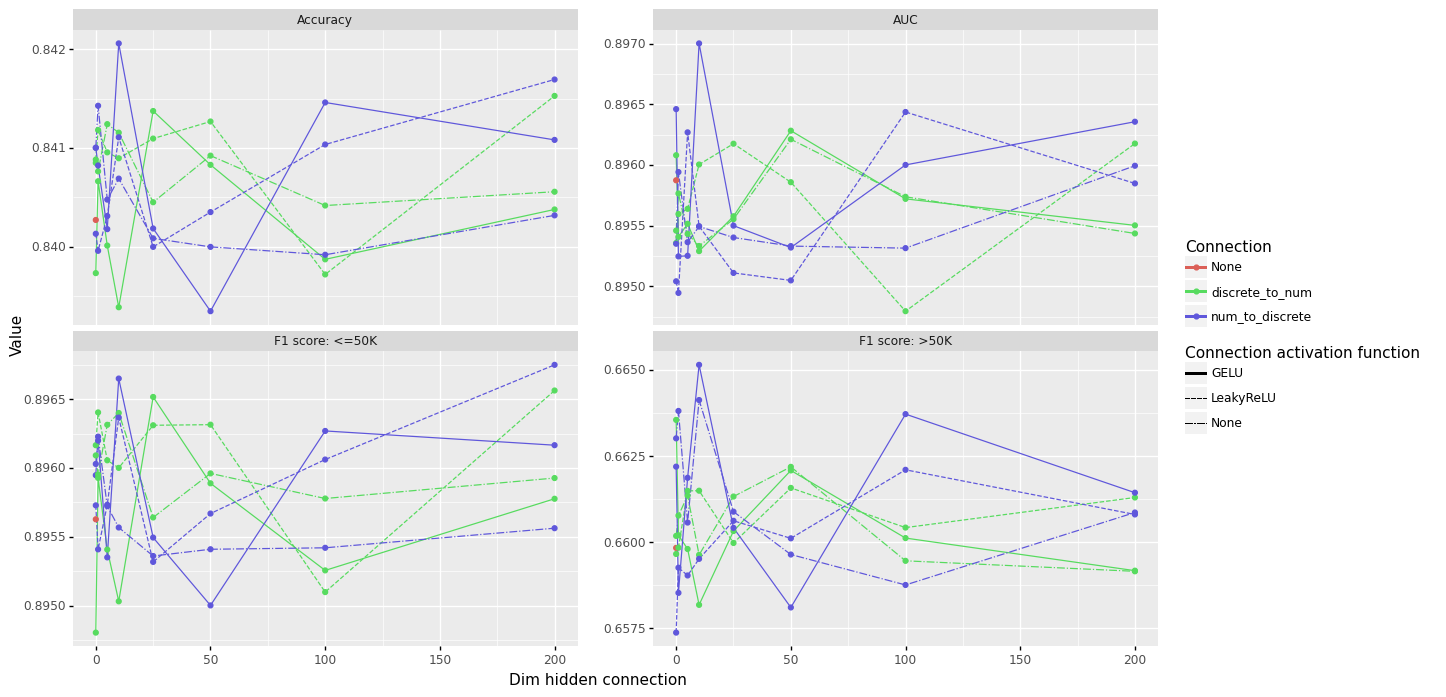

In [15]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [29]:
result_add_connection_advanced

,Dim hidden connection,Connection,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,0.840564,0.895802,0.778553,0.895728,0.661377,0.002749,0.002265,0.002608,0.002172,0.003854
1,0,discrete_to_num,0.840212,0.894836,0.776251,0.895872,0.656629,0.001982,0.001023,0.002290,0.001582,0.004087
2,0,num_to_discrete,0.840850,0.896037,0.778818,0.895947,0.661689,0.001303,0.001016,0.001417,0.001113,0.002729
3,1,discrete_to_num,0.840704,0.895812,0.778969,0.895775,0.662164,0.001687,0.001132,0.002667,0.001265,0.004897
4,1,num_to_discrete,0.841381,0.896303,0.779591,0.896285,0.662897,0.001671,0.000983,0.002667,0.001246,0.004903
5,5,discrete_to_num,0.842105,0.896706,0.779614,0.896954,0.662274,0.002206,0.000904,0.002962,0.001790,0.005573
6,5,num_to_discrete,0.839900,0.895479,0.778184,0.895180,0.661189,0.001556,0.001498,0.002319,0.001204,0.004294
7,10,discrete_to_num,0.841839,0.896112,0.779995,0.896637,0.663353,0.001664,0.000829,0.002643,0.001124,0.004550
8,10,num_to_discrete,0.840425,0.895976,0.777340,0.895852,0.658829,0.002242,0.001727,0.003138,0.001605,0.005289
9,25,discrete_to_num,0.840312,0.895592,0.778201,0.895567,0.660835,0.002249,0.001676,0.002839,0.001669,0.004680


  0%|          | 0/250 [00:00<?, ?it/s]

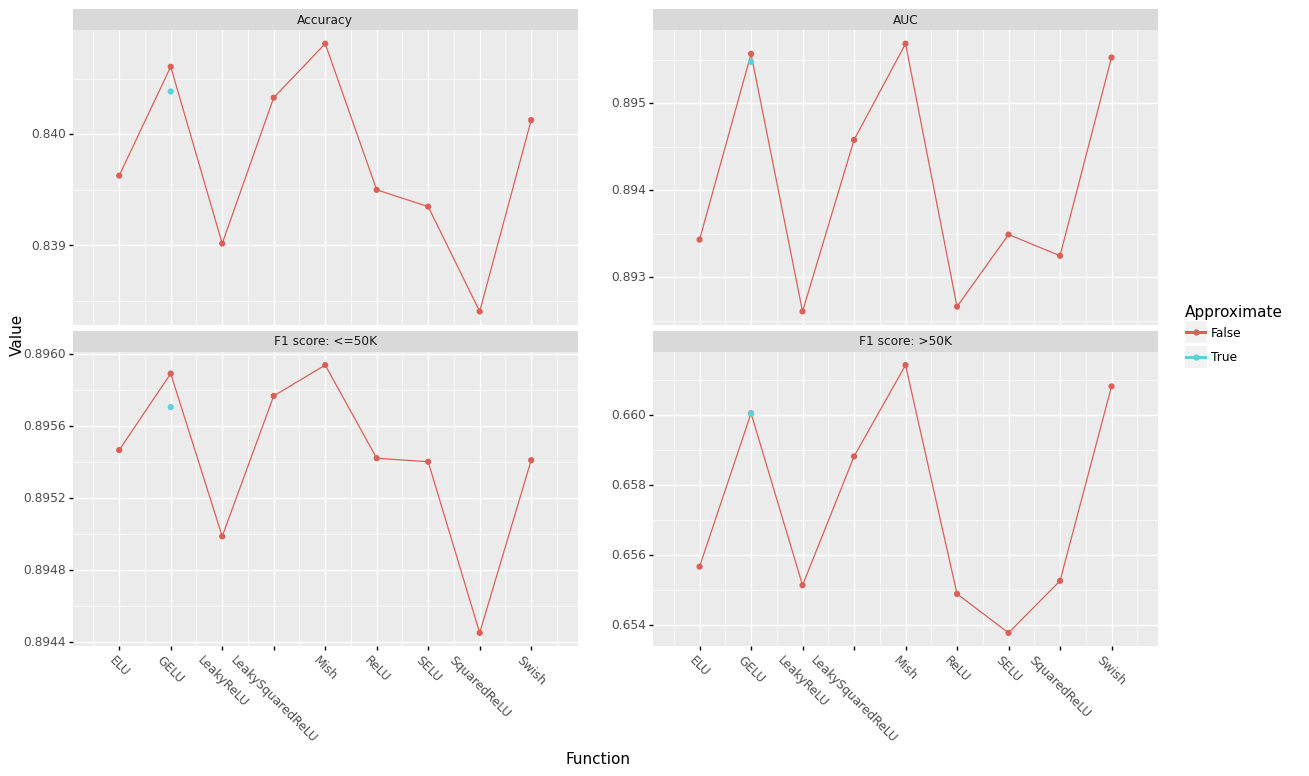

In [19]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=-45)

In [20]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.839628,0.893432,0.775561,0.895466,0.655656,0.002024,0.001878,0.003455,0.001402,0.006203
1,GELU,False,0.840608,0.895567,0.777967,0.895890,0.660043,0.001864,0.001511,0.002652,0.001487,0.004999
2,GELU,True,0.840385,0.895476,0.777869,0.895704,0.660034,0.001736,0.001106,0.002779,0.001258,0.005017
3,LeakyReLU,False,0.839017,0.892606,0.775055,0.894987,0.655123,0.002784,0.002098,0.003605,0.002206,0.006503
4,LeakySquaredReLU,False,0.840329,0.894578,0.777288,0.895766,0.658810,0.002272,0.001563,0.003514,0.001698,0.006399
5,Mish,False,0.840815,0.895685,0.778680,0.895937,0.661423,0.002204,0.001490,0.003308,0.001640,0.005948
6,ReLU,False,0.839501,0.892662,0.775149,0.895421,0.654876,0.002761,0.002716,0.003915,0.002124,0.007104
7,SELU,False,0.839349,0.893491,0.774581,0.895401,0.653761,0.002265,0.001818,0.003619,0.001628,0.006497
8,SquaredReLU,False,0.838406,0.893247,0.774850,0.894452,0.655249,0.002003,0.001412,0.003650,0.001659,0.007330
9,Swish,False,0.840127,0.895526,0.778112,0.895410,0.660814,0.001855,0.001618,0.003091,0.001310,0.005567


  0%|          | 0/20 [00:00<?, ?it/s]

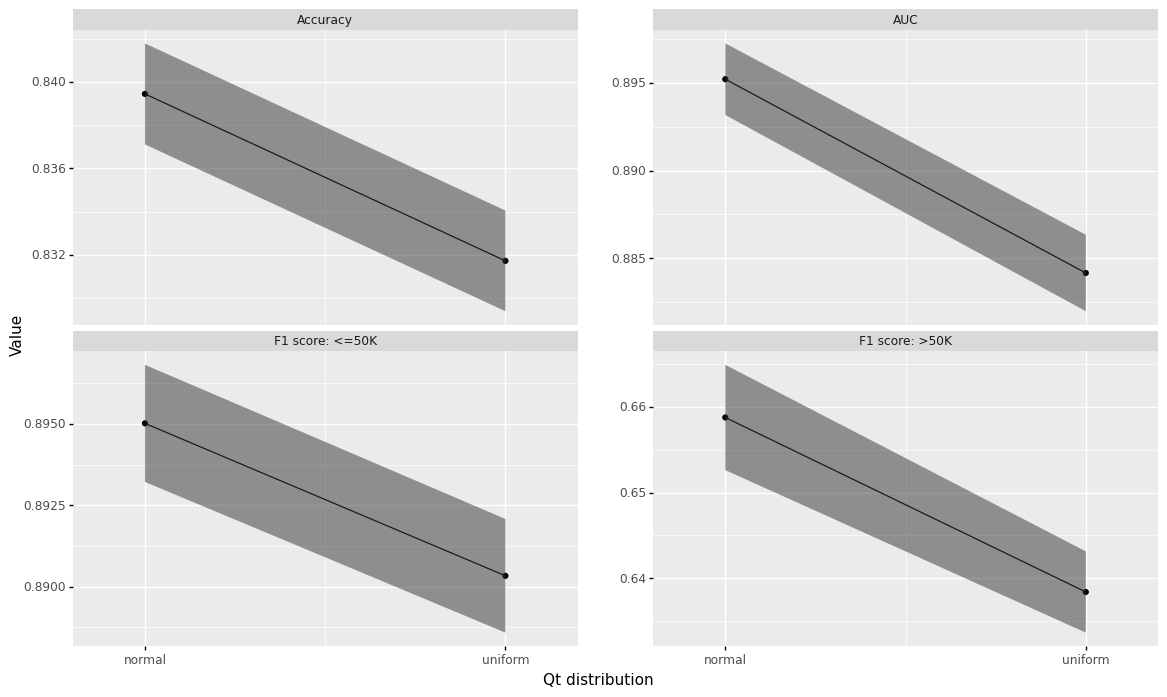

In [38]:
result_qt_distribution = plot_hp_tuning("qt_distribution")

  0%|          | 0/40 [00:00<?, ?it/s]

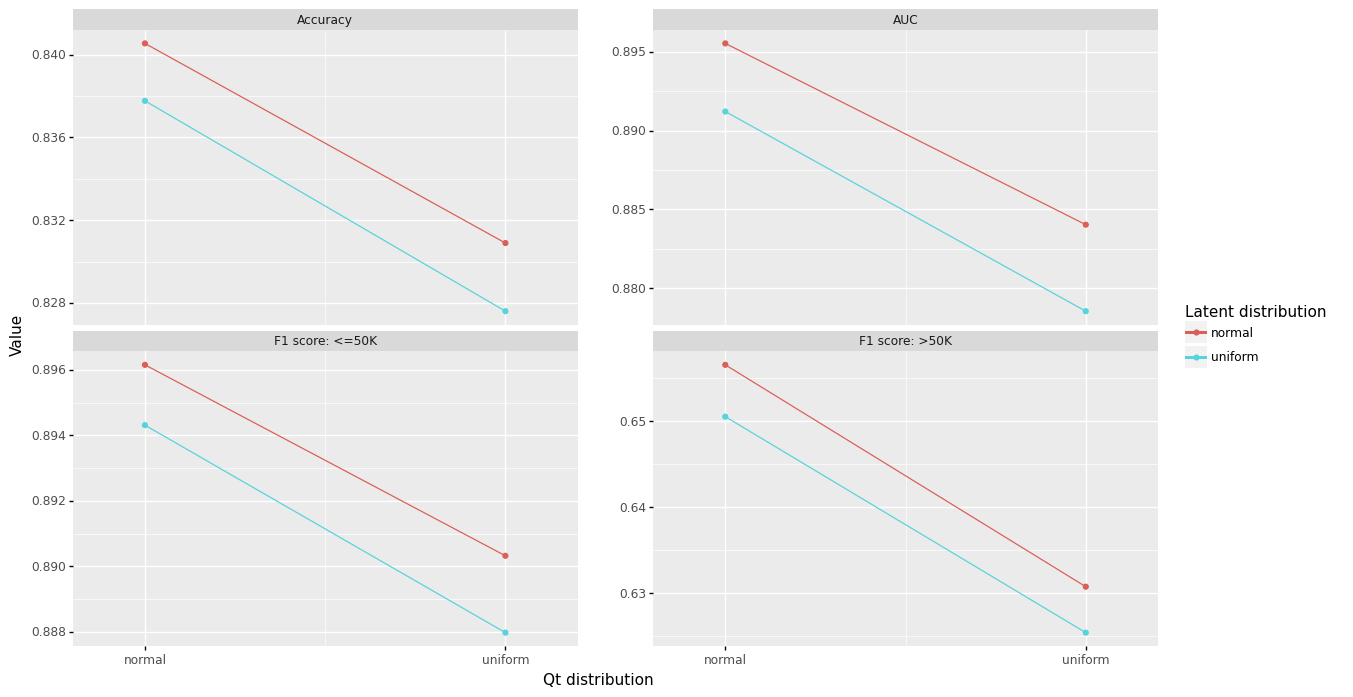

In [40]:
result_qt_transformation = plot_hp_tuning("qt_transformation")

  0%|          | 0/440 [00:00<?, ?it/s]

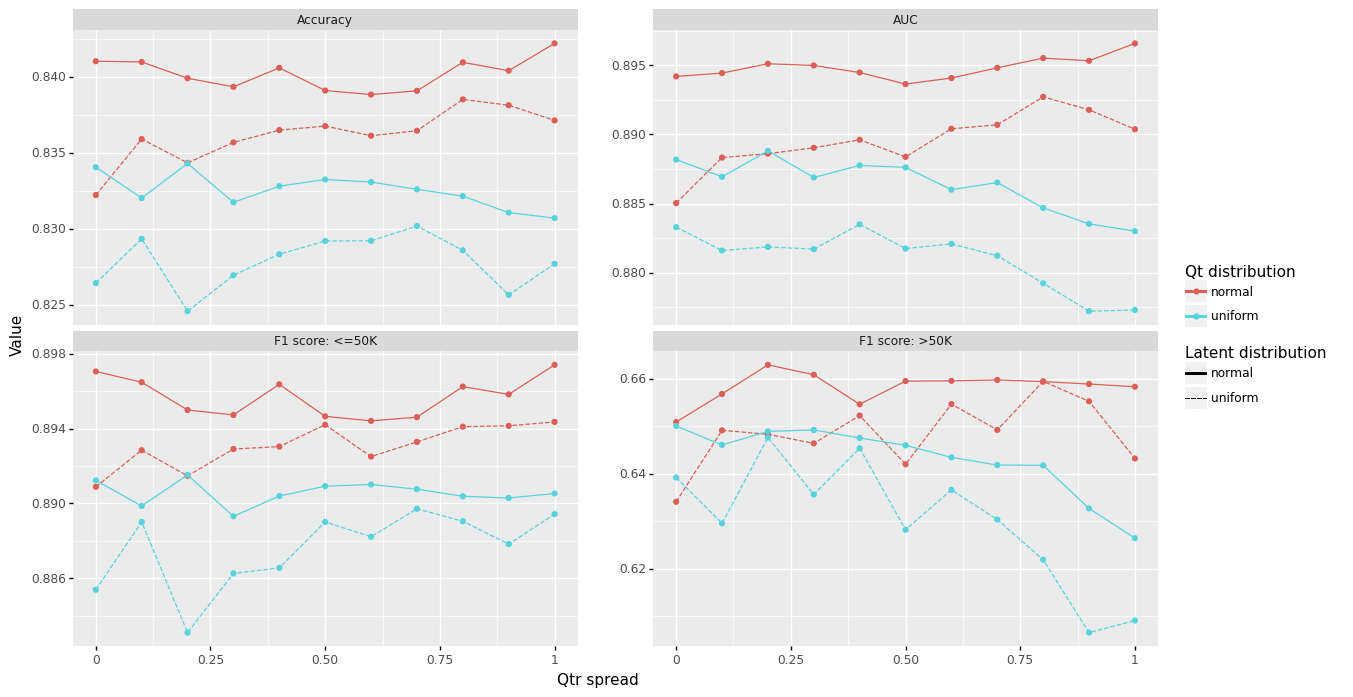

In [23]:
result_qt_transformation = plot_hp_tuning("qt_transformation")

In [ ]:
result_qt_transformation

  0%|          | 0/50 [00:00<?, ?it/s]

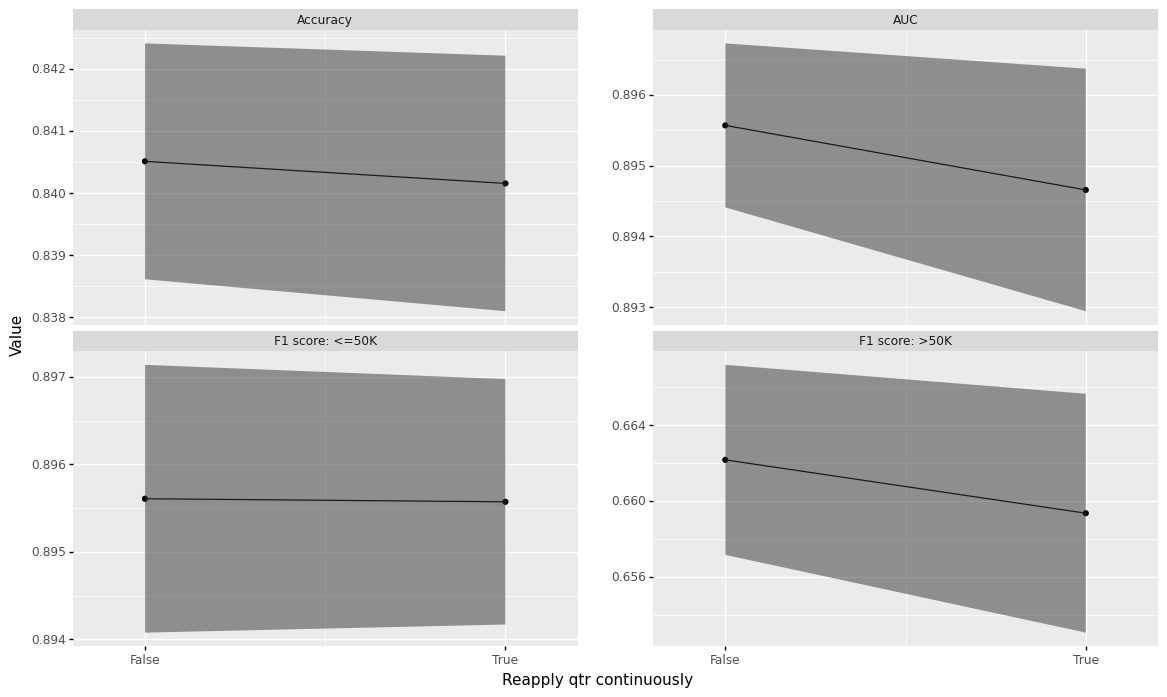

In [46]:
result_reapply_qtr_continuously = plot_hp_tuning("reapply_qtr_continuously")

  0%|          | 0/20 [00:00<?, ?it/s]

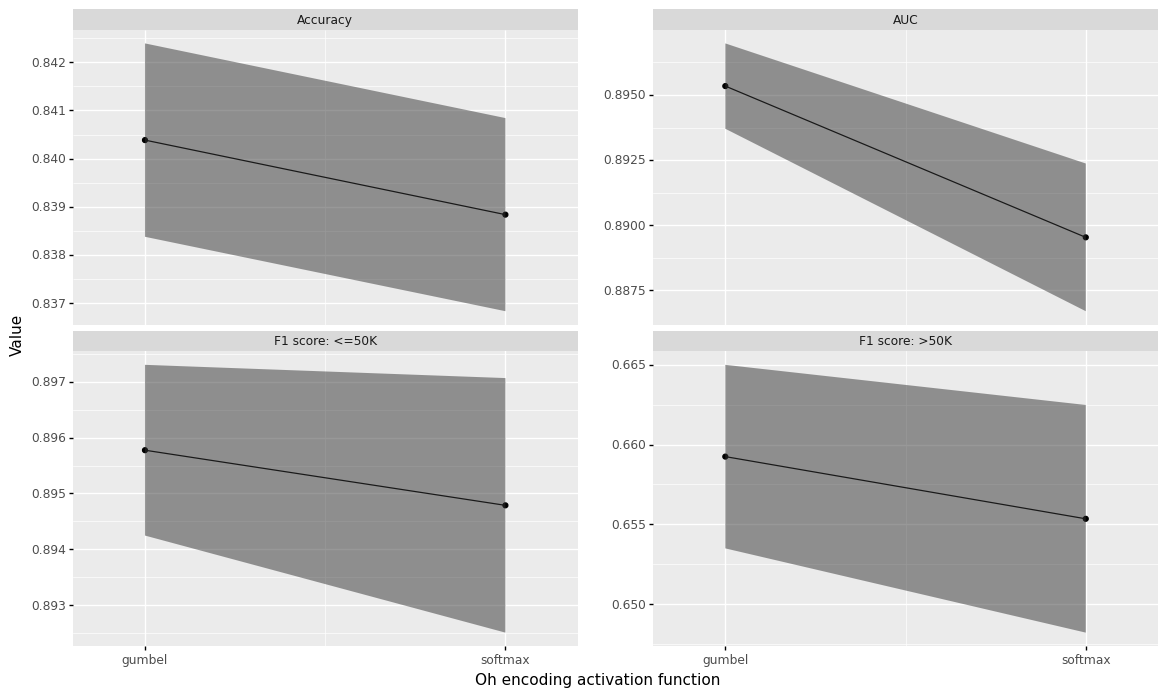

In [48]:
result_oh_encoding_activation_function = plot_hp_tuning("oh_encoding_activation_function")

  0%|          | 0/440 [00:00<?, ?it/s]

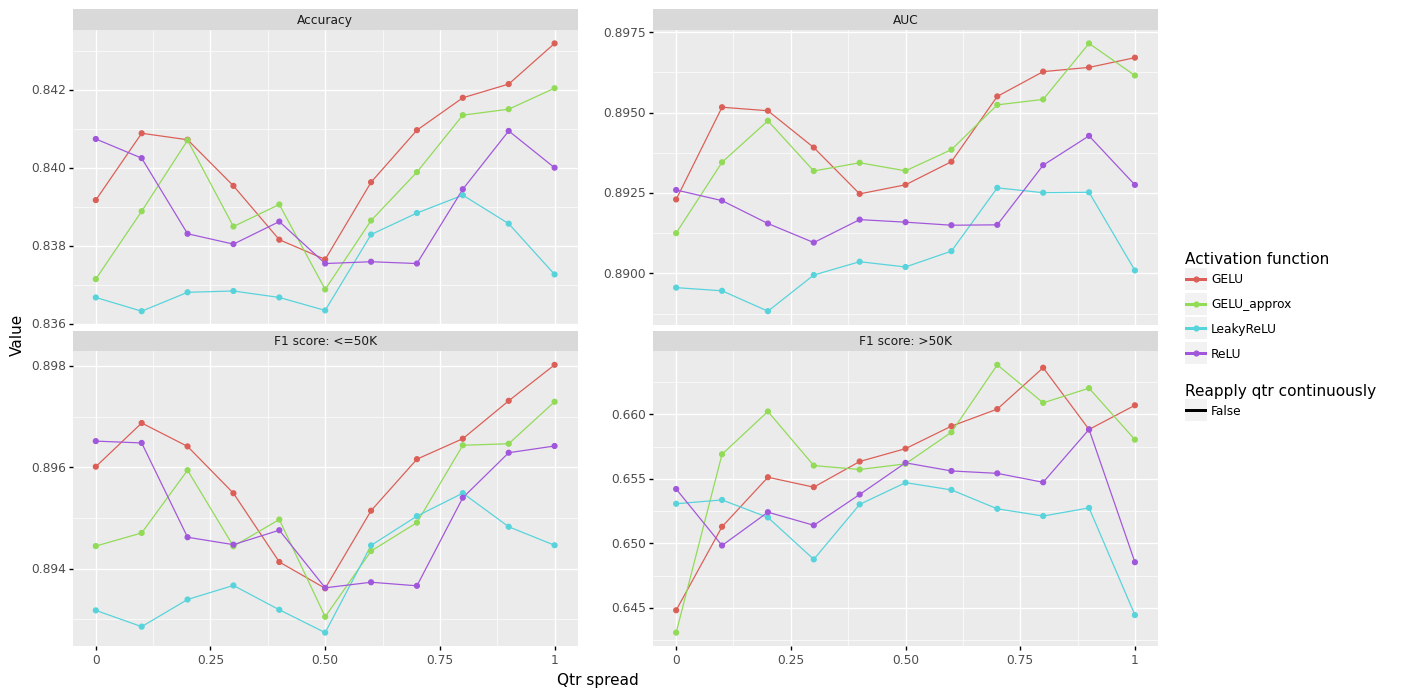

In [18]:
result_spread_and_activation = plot_hp_tuning("spread_and_activation")

  0%|          | 0/630 [00:00<?, ?it/s]

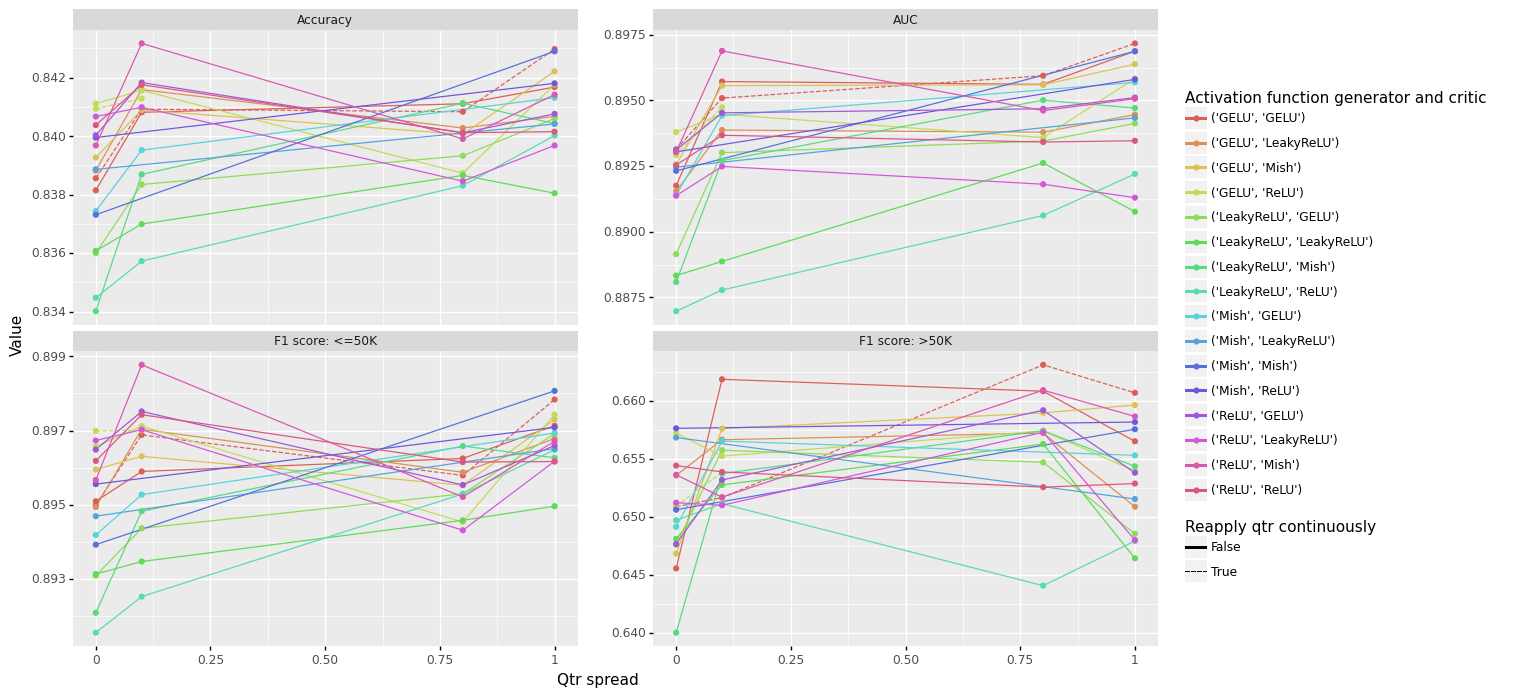

In [19]:
result_spread_and_activations = plot_hp_tuning("spread_and_activations")

In [13]:
result_spread_and_activations.sort_values("Value Accuracy", ascending=False)

,Qtr spread,Activation function generator and critic,Reapply qtr continuously,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
10,1,"('Mish', 'Mish')",False,0.842902,0.896869,0.777805,0.898067,0.657543,0.001401,0.001357,0.002843,0.000893,0.005217
2,1,"('GELU', 'Mish')",False,0.842218,0.896381,0.778463,0.897294,0.659631,0.001849,0.001610,0.003504,0.001378,0.006729
11,1,"('Mish', 'ReLU')",False,0.841806,0.895801,0.777623,0.897085,0.658162,0.002754,0.001535,0.003114,0.002054,0.004836
3,1,"('GELU', 'ReLU')",False,0.841766,0.895836,0.775688,0.897431,0.653945,0.002236,0.001279,0.002998,0.001553,0.004776
0,1,"('GELU', 'GELU')",False,0.841680,0.896875,0.776815,0.897130,0.656500,0.001941,0.001661,0.003049,0.001348,0.005303
14,1,"('ReLU', 'Mish')",False,0.841421,0.895063,0.777677,0.896710,0.658644,0.001979,0.001432,0.003592,0.001433,0.006741
8,1,"('Mish', 'GELU')",False,0.841315,0.895684,0.776112,0.896931,0.655292,0.002179,0.001443,0.003443,0.001427,0.005771
12,1,"('ReLU', 'GELU')",False,0.840764,0.895108,0.775192,0.896596,0.653788,0.001699,0.001894,0.003289,0.001194,0.006177
1,1,"('GELU', 'LeakyReLU')",False,0.840677,0.894461,0.773823,0.896785,0.650861,0.001710,0.001277,0.003059,0.001142,0.005484
4,1,"('LeakyReLU', 'GELU')",False,0.840604,0.894123,0.772717,0.896916,0.648519,0.001717,0.001851,0.003867,0.001313,0.007695


  0%|          | 0/220 [00:00<?, ?it/s]

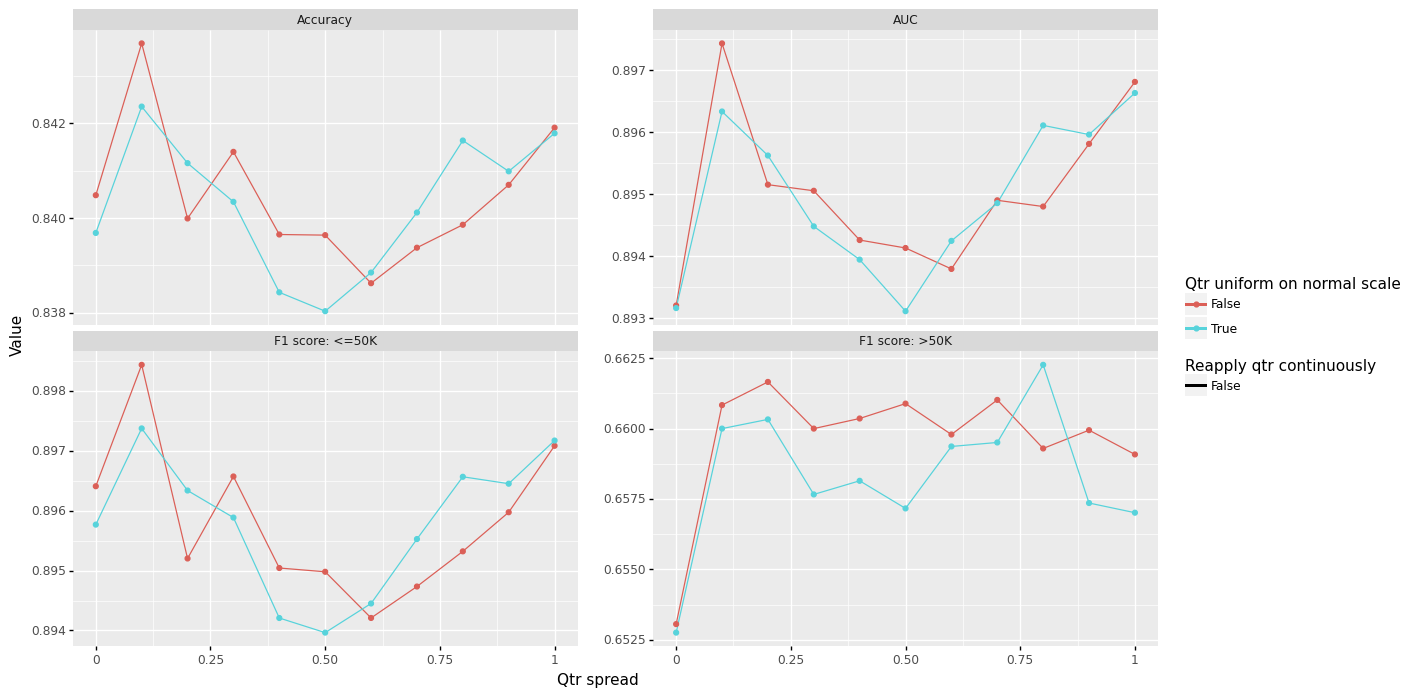

In [13]:
result_qtr = plot_hp_tuning("qtr")

  0%|          | 0/40 [00:00<?, ?it/s]

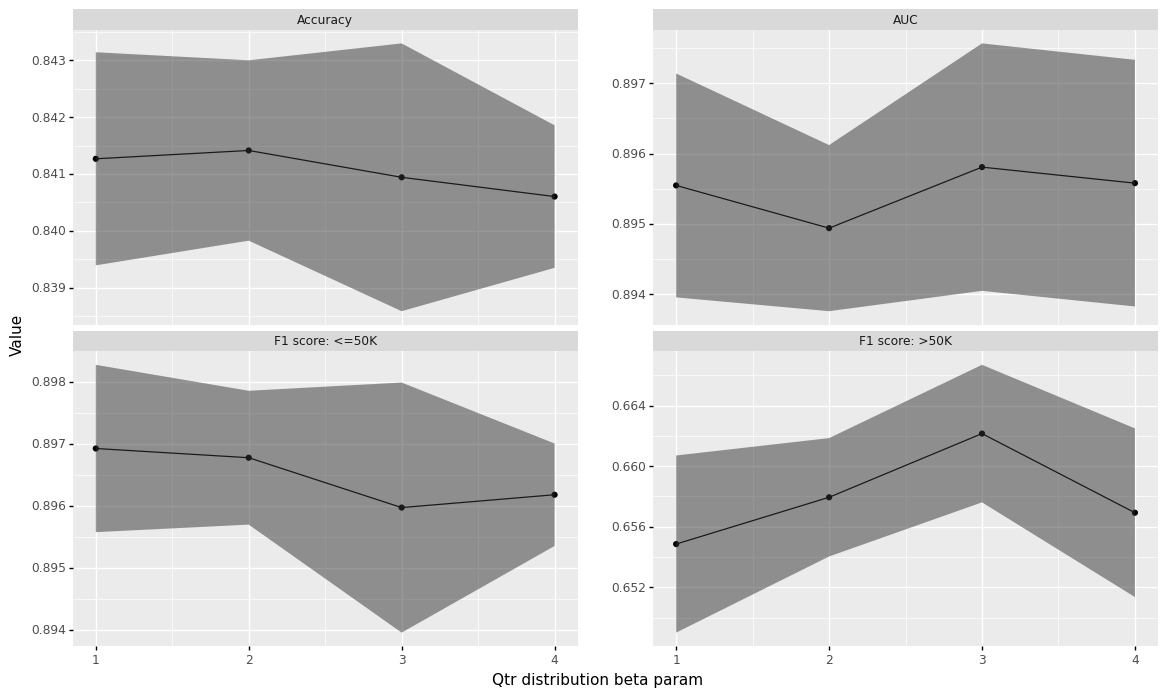

In [7]:
result_qtr_distribution_beta_param = plot_hp_tuning("qtr_distribution_beta_param")

[autoreload of helpers failed: Traceback (most recent call last):
  File "C:\Users\Arne\anaconda3\envs\tf2.4\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Arne\anaconda3\envs\tf2.4\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Arne\anaconda3\envs\tf2.4\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Arne\anaconda3\envs\tf2.4\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "\\sambaad.stud.ntnu.no\arneir\Master-thesis-cf\helpers\__init__.py", line 1, in <module>
    from . import compare, hp_tuning, eval, nmi_matrix, comparison
  File "\\s

  0%|          | 0/190 [00:00<?, ?it/s]

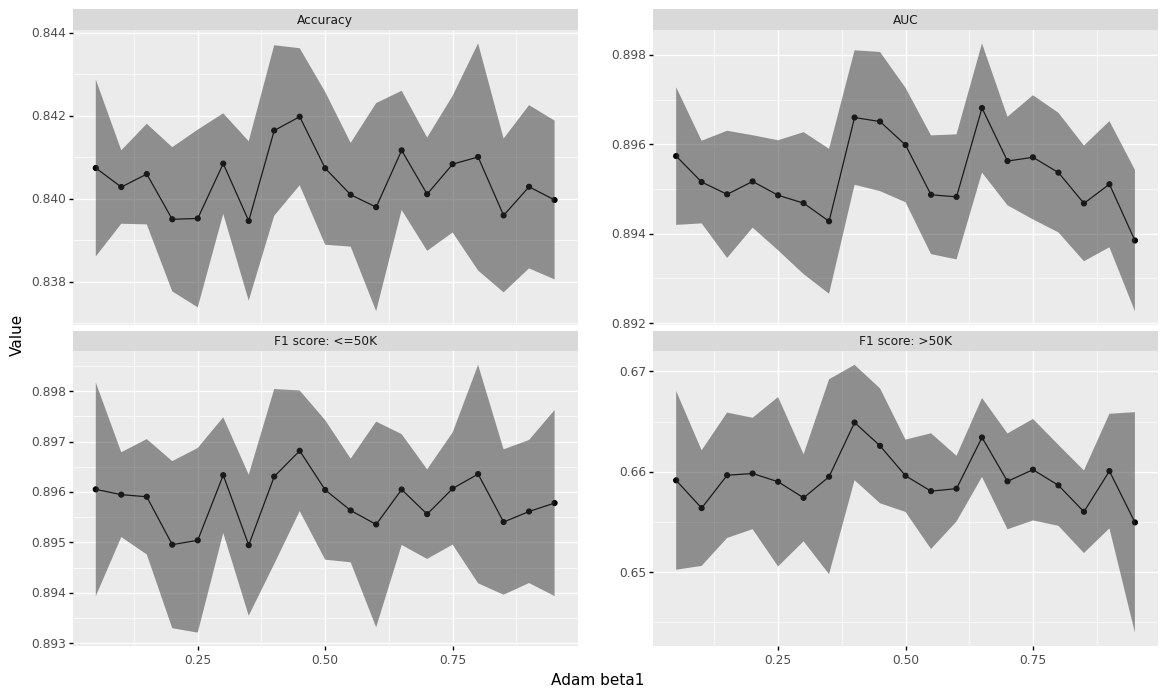

In [17]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

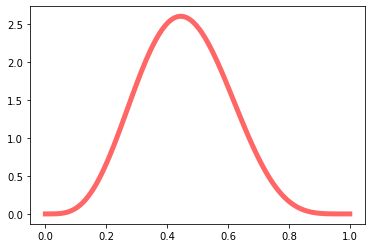

In [64]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, b =  5,6
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0,1, 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')